# Color Discretization

### ColorDiscretizer demo

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
from utils.color_discretizer import ColorDiscretizer
from utils.color_utils import YUV_to_RGB, RGB_to_YUV
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

%matplotlib inline

/Users/marc/.miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [52]:
cd = ColorDiscretizer(max_categories=1000)
imdir = "../data/iccv09Data/images/"
cd.train(imdir, 30)

/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:88: RuntimeWarning: divide by zero encountered in log10
  logheatmap = np.log10(hm)
/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:103: RuntimeWarning: divide by zero encountered in log10
  logweights_matrix = np.log10(weights_matrix)


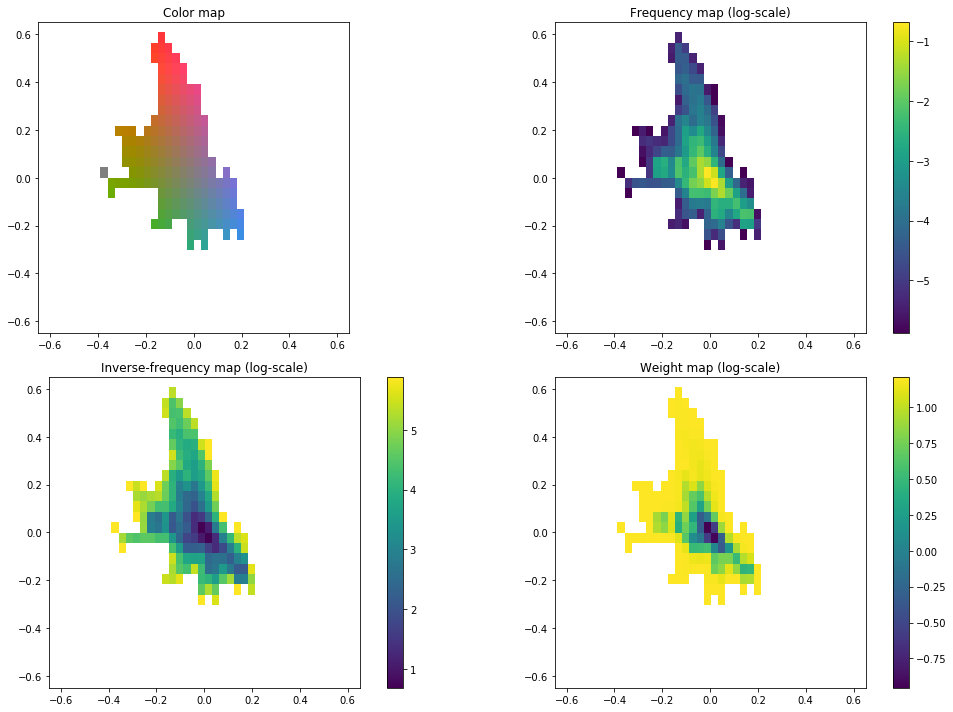

In [67]:
cd.plot_heatmap()

In [55]:
from matplotlib.pyplot import imread
from utils.color_utils import RGB_to_YUV

image = imread("../data/iccv09Data/images/0000051.jpg").astype(np.dtype("float32"))
YUVimage = RGB_to_YUV(image)
UVimage = YUVimage[:, :, 1:]
UVpixels = np.reshape(UVimage, newshape=[-1, 2])

In [56]:
cd.categorize(UVimage)

array([[158, 158, 158, ..., 158, 158, 158],
       [158, 158, 158, ..., 158, 158, 158],
       [158, 158, 158, ..., 158, 158, 158],
       ...,
       [ 94,  94,  94, ..., 112, 112, 112],
       [ 94,  94,  94, ..., 112, 112, 112],
       [ 94,  94,  94, ..., 112, 112, 112]])

In [57]:
for i in range(cd.max_categories):
    print(i, 
          cd.indices_to_xycategories_map[i], 
          '\t', 
          cd.categories_mean_pixels[i],
          '\t',
          cd.category_frequency[i],
          '\t',
          cd.weights[i],
         )

0 (2, 15) 	 [0. 0.] 	 2.60778859527121e-06 	 16.220413532649914
1 (3, 13) 	 [-0.345 -0.065] 	 2.173157162726008e-06 	 16.225369081847504
2 (3, 14) 	 [-0.345      -0.02166667] 	 6.519471488178025e-06 	 16.175949433529542
3 (4, 14) 	 [-0.315      -0.02166667] 	 2.65125173852573e-05 	 15.952442964198667
4 (4, 19) 	 [-0.315  0.195] 	 2.173157162726008e-06 	 16.225369081847504
5 (5, 14) 	 [-0.285      -0.02166667] 	 3.607440890125173e-05 	 15.847717597371872
6 (5, 16) 	 [-0.285  0.065] 	 1.303894297635605e-06 	 16.235289269708453
7 (5, 17) 	 [-0.285       0.10833333] 	 2.1731571627260085e-06 	 16.225369081847504
8 (5, 18) 	 [-0.285       0.15166667] 	 6.084840055632823e-06 	 16.18087784710612
9 (5, 19) 	 [-0.285  0.195] 	 3.4770514603616134e-06 	 16.210511509848473
10 (6, 14) 	 [-0.255      -0.02166667] 	 2.65125173852573e-05 	 15.952442964198667
11 (6, 15) 	 [-0.255       0.02166667] 	 8.257997218358832e-06 	 16.156265764869584
12 (6, 16) 	 [-0.255  0.065] 	 8.692628650904034e-06 	 16.1513

102 (13, 23) 	 [-0.045       0.36833333] 	 0.00011604659248956885 	 15.022871751277274
103 (13, 24) 	 [-0.045       0.41166667] 	 3.911682892906815e-05 	 15.814683643527863
104 (13, 25) 	 [-0.045  0.455] 	 4.780945757997219e-06 	 16.19568112311606
105 (14, 8) 	 [-0.015      -0.28166667] 	 1.303894297635605e-06 	 16.235289269708453
106 (14, 9) 	 [-0.015      -0.23833333] 	 2.60778859527121e-05 	 15.957236104668652
107 (14, 10) 	 [-0.015 -0.195] 	 6.432545201668984e-05 	 15.546181643299786
108 (14, 11) 	 [-0.015      -0.15166667] 	 5.6502086230876215e-05 	 15.628528993898325
109 (14, 12) 	 [-0.015      -0.10833333] 	 0.00019080319888734352 	 14.325864140658657
110 (14, 13) 	 [-0.015 -0.065] 	 0.004878303198887344 	 3.6646368185474256
111 (14, 14) 	 [-0.015      -0.02166667] 	 0.08587056675938803 	 0.26443337694968044
112 (14, 15) 	 [-0.015       0.02166667] 	 0.2062904207232267 	 0.11112879627110424
113 (14, 16) 	 [-0.015  0.065] 	 0.027626912378303198 	 0.7946558323724273
114 (14, 17) 	

KeyError: 176

In [ ]:
plt.hist(list(cd.weights.values()))
plt.show()

In [58]:
categories_distributions = np.abs(np.random.rand(4, 4, cd.n_categories))
cd.UVpixels_from_distribution(categories_distributions)

array([[[-0.06885443,  0.08608394],
        [-0.05766436,  0.08908418],
        [-0.05342722,  0.08505462],
        [-0.06189867,  0.09328034]],

       [[-0.05729382,  0.07217967],
        [-0.05944509,  0.07828476],
        [-0.05904435,  0.08189786],
        [-0.05813949,  0.06970237]],

       [[-0.05936206,  0.07498563],
        [-0.06073207,  0.08175574],
        [-0.06201154,  0.09125953],
        [-0.05044342,  0.06935747]],

       [[-0.06696565,  0.08381134],
        [-0.06179547,  0.09281321],
        [-0.05684613,  0.07712405],
        [-0.05572402,  0.07836335]]])

### L2 cost of categorizing

In [59]:
image = imread("../data/iccv09Data/images/0002136.jpg").astype(np.dtype("float32"))
YUVimage = RGB_to_YUV(image)
UVimage = YUVimage[:, :, 1:]
Yimage = YUVimage[:, :, :1]

In [60]:
pixels_categories = cd.categorize(UVimage)

pixel_categories_onehot = to_categorical(pixels_categories, num_classes=cd.n_categories)

reconstructed_UVimage = cd.UVpixels_from_distribution(pixel_categories_onehot)

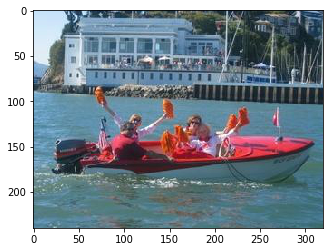

In [61]:
plt.imshow(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2))/255.)
plt.show()

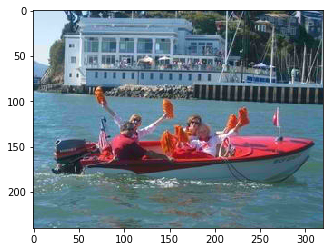

In [62]:
plt.imshow(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2)) / 255)
plt.show()

In [63]:
np.linalg.norm(reconstructed_UVimage - UVimage, axis = (0, 1)) / len(UVpixels) / np.std(UVpixels, axis = 0)

array([0.00073868, 0.00108798])

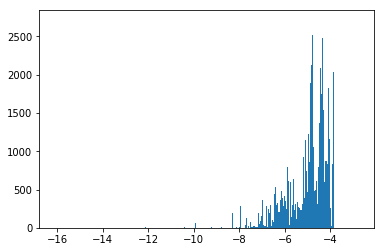

In [64]:
plt.hist(np.reshape(np.log(np.abs(reconstructed_UVimage - UVimage)), [-1, 1]), bins = 1000)
plt.show()

Note that sometimes, the return to RGB space goes over 255 or below 0, so we added a correction to the function.

In [65]:
print(np.max(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2),correction = False)))
print(np.min(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2),correction = False)))

255.00000000000006
-1.4155343563970746e-14


In [66]:
print(np.max(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2), correction = False)))
print(np.min(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2), correction = False)))

262.76616826555386
-3.4311283848686607


### Thresholding out rare pixels

/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:88: RuntimeWarning: divide by zero encountered in log10
  logheatmap = np.log10(hm)
/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:103: RuntimeWarning: divide by zero encountered in log10
  logweights_matrix = np.log10(weights_matrix)


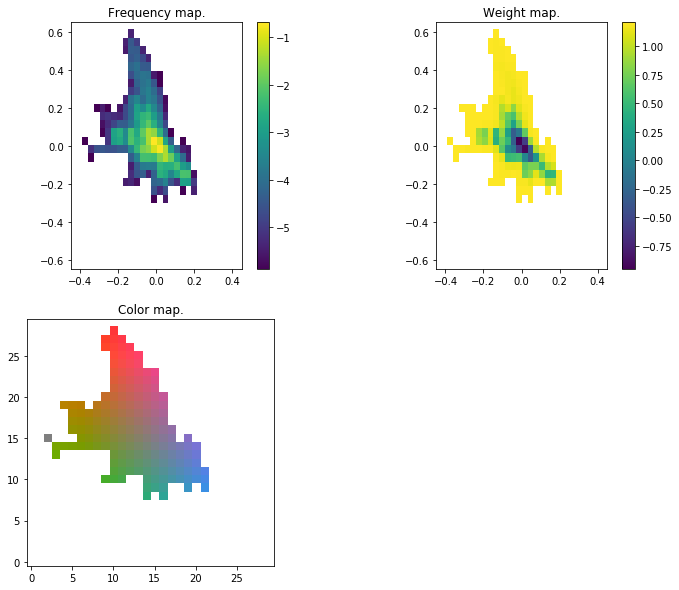

Remaining colors: 176


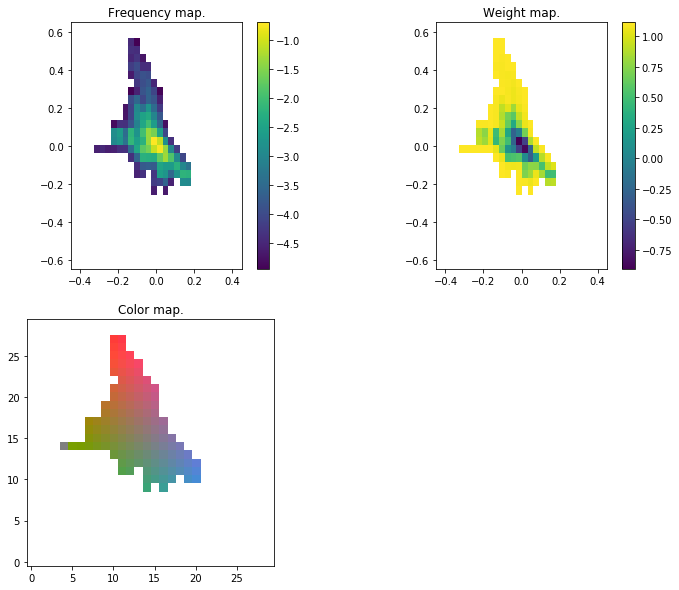

Remaining colors: 128


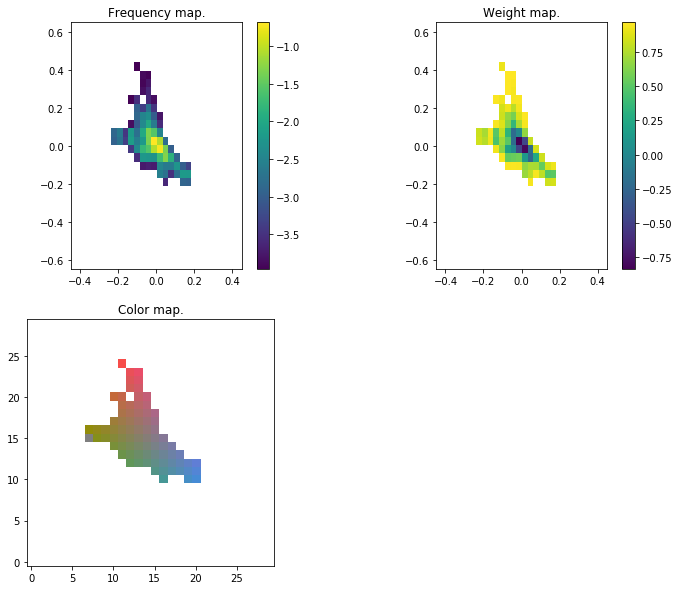

Remaining colors: 79


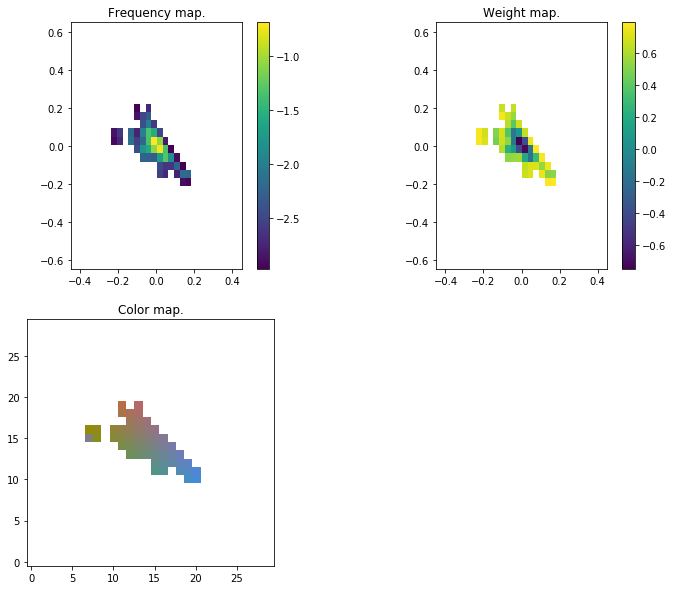

Remaining colors: 51


In [19]:
for threshold in [.000001, .00001, .0001, .001]:
    cd = ColorDiscretizer(threshold=threshold)
    imdir = "../data/iccv09Data/images/"
    cd.train(imdir, 30)
    cd.plot_heatmap()
    print("Remaining colors: {}".format(np.sum(cd.heatmap > cd.threshold)))

### Using a fixed number of categories

/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:88: RuntimeWarning: divide by zero encountered in log10
  logheatmap = np.log10(hm)
/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:103: RuntimeWarning: divide by zero encountered in log10
  logweights_matrix = np.log10(weights_matrix)


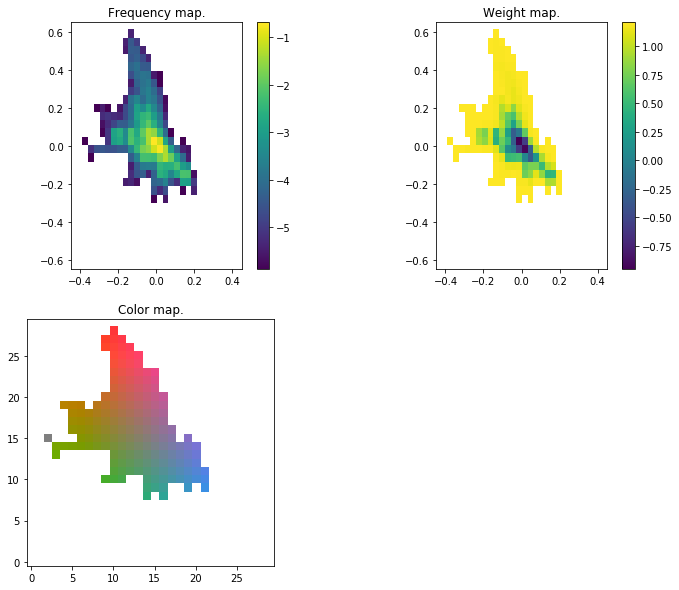

Remaining colors: 176


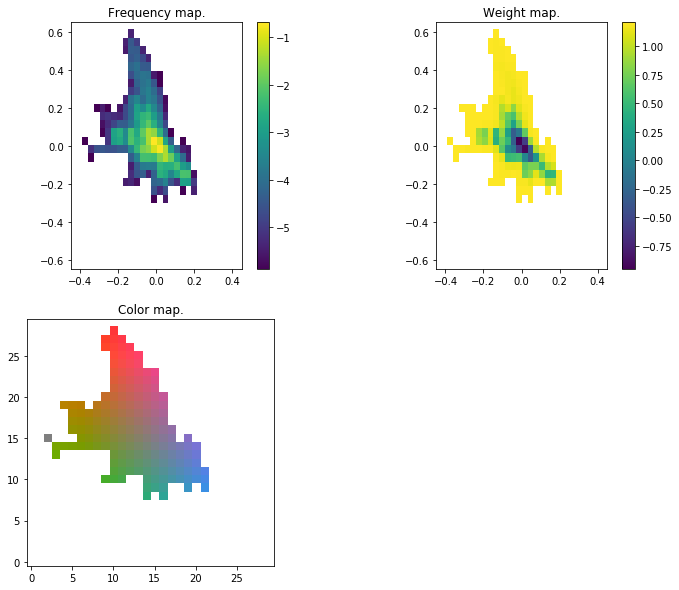

Remaining colors: 176


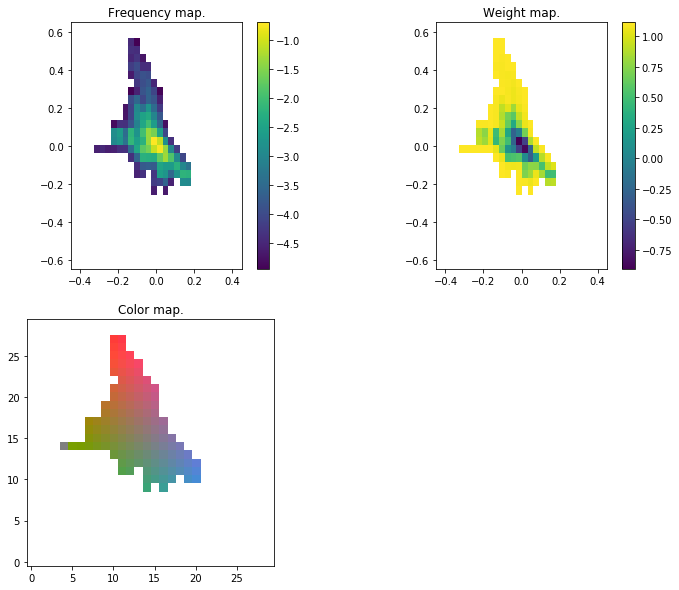

Remaining colors: 128


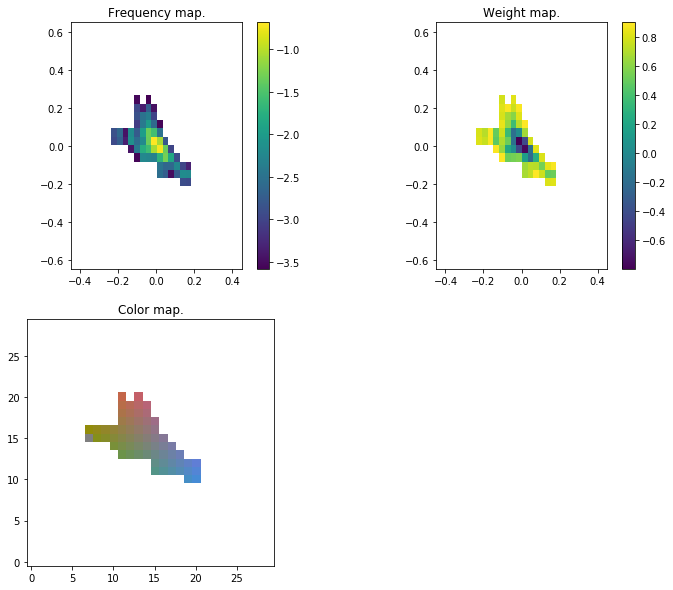

Remaining colors: 64


In [20]:
for max_cat in [250,200,128,64]:
    cd = ColorDiscretizer(threshold=.000001,max_categories=max_cat)
    imdir = "../data/iccv09Data/images/"
    cd.train(imdir, 30)
    cd.plot_heatmap()
    print("Remaining colors: {}".format(np.sum(cd.heatmap > cd.threshold)))